In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

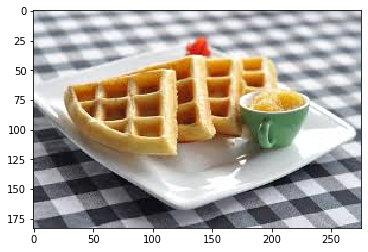

In [24]:
image = cv2.imread('images/waffle.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

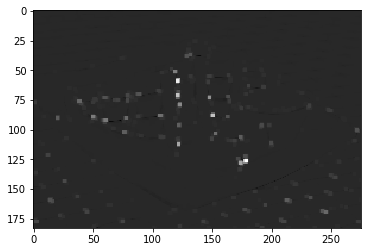

In [25]:
# detect corners
image_copy = np.copy(image)
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

#detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# dilate the corners image to enhance the corners
dst = cv2.dilate(dst, None)
plt.imshow(dst, cmap='gray')

In [26]:
dst.shape

(183, 276)

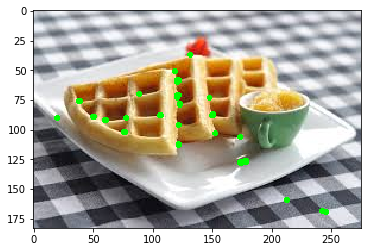

In [27]:
# Extract and display the strong corners
#define a threshold for extracting strong corners
thresh = 0.2 * dst.max()

# create an image copy
corner_shape = np.copy(image_copy)

#iterate for all the corners
for i in range(0, dst.shape[0]):
    for j in range(0, dst.shape[1]):
        if dst[i,j] > thresh:
            #image, center pt, radius, color, thickness
            cv2.circle(corner_shape, (j, i), 1, (0,255,0), 1)
plt.imshow(corner_shape)